In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
#load info
initial_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.initial.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
initial_gene = initial_gene.T
initial_gene.index = initial_gene.index.map(lambda x: str(x)[:-2])
initial_gene_marker = initial_gene.loc[:,["TMEM119", "SALL1", "NAV3", "P2RY12"]]
initial_gene_marker

,TMEM119,SALL1,NAV3,P2RY12
PS001,4.497868,5.572022,2.976651,6.167882
PS002,0.822076,4.759865,1.352908,2.224992
PS003,1.080119,4.753490,1.157426,2.686523
PS004,5.291875,4.517430,1.753415,3.625322
PS005,3.233365,5.454537,1.945411,4.041885
PS006,3.519593,3.890379,2.539380,4.105145
PS007,3.864505,4.760569,4.215135,5.364555
PS008,2.748271,5.483959,4.085170,4.708343
PS009,1.832749,5.543265,0.968370,2.834117
PS010,2.103379,3.447470,0.943801,2.967841


In [7]:
recurrence_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.recurrence.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
recurrence_gene = recurrence_gene.T
recurrence_gene.index = recurrence_gene.index.map(lambda x: str(x)[:-2])
recurrence_gene_marker = recurrence_gene.loc[:,["TMEM119", "SALL1", "NAV3", "P2RY12"]]
recurrence_gene_marker

,TMEM119,SALL1,NAV3,P2RY12
PS001,2.969302,5.120512,3.268968,4.479652
PS002,3.430206,4.907675,3.343248,5.308827
PS003,4.243972,5.345704,4.358316,6.298879
PS004,2.770420,4.168975,2.514006,4.340418
PS005,1.702914,5.709050,0.533703,1.940319
PS006,3.375303,4.714446,1.166916,3.409322
PS007,2.414710,4.671038,1.232674,2.760375
PS008,0.744223,5.770766,1.913690,1.599732
PS009,4.338915,5.653633,1.460178,5.104971
PS010,2.752014,4.437488,1.166916,2.783487


In [8]:
common = initial_gene_marker.index.intersection(Patient_Info.index)
common2 = recurrence_gene_marker.index.intersection(Patient_Info.index)
final_common = recurrence_gene_marker.index.intersection(initial_gene_marker.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', length=181)

In [9]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
pathology = combined_data.loc[:, combined_data.columns == "Molecular pathology (per GLASS)"]

In [10]:
select = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Glioblastoma")]
pathology.loc[select.index, 'Histology'] = "Glioblastoma"

/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
#selecting for Diffuse Astrocytoma
select2 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Diffuse Astrocytoma")]
pathology.loc[select2.index, 'Histology'] = "Diffuse Astrocytoma"

/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [12]:
#selecting for Anaplastic Astrocytoma
select3 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Anaplastic Astrocytoma")]
pathology.loc[select3.index, 'Histology'] = "Anaplastic Astrocytoma"

In [13]:
#selecting for Oligodendroglioma
select4 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Oligodendroglioma")]
pathology.loc[select4.index, 'Histology'] = "Oligodendroglioma"

In [14]:
#selecting for Anaplastic Oligodendroglioma
select5 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Anaplastic Oligodendroglioma")]
pathology.loc[select5.index, 'Histology'] = "Anaplastic Oligodendroglioma"

In [15]:
#TMEM119
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "TMEM119"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "TMEM119"]
recurrence.columns = ['Recurrent']
TMEM119_data = initial.join(recurrence)
TMEM119_data

,Initial,Recurrent
PS001,4.497868,2.969302
PS002,0.822076,3.430206
PS003,1.080119,4.243972
PS004,5.291875,2.770420
PS005,3.233365,1.702914
PS006,3.519593,3.375303
PS007,3.864505,2.414710
PS008,2.748271,0.744223
PS009,1.832749,4.338915
PS010,2.103379,2.752014


In [16]:
TMEM119_final = pd.concat([pathology, TMEM119_data], axis=1)
TMEM119_final.index.name = 'Mixture'
TMEM119_final = TMEM119_final.drop(['Molecular pathology (per GLASS)'], axis=1)
TMEM119_final = TMEM119_final.sort_values(by='Mixture')
TMEM119_final

,Histology,Initial,Recurrent
Mixture,,,
PS001,Glioblastoma,4.497868,2.969302
PS002,Glioblastoma,0.822076,3.430206
PS003,Glioblastoma,1.080119,4.243972
PS004,Glioblastoma,5.291875,2.770420
PS005,Glioblastoma,3.233365,1.702914
PS006,Glioblastoma,3.519593,3.375303
PS007,Glioblastoma,3.864505,2.414710
PS008,Glioblastoma,2.748271,0.744223
PS009,Glioblastoma,1.832749,4.338915


In [17]:
TMEM119_mdf = pd.melt(TMEM119_final.reset_index(), id_vars=('Mixture','Histology'))
TMEM119_mdf

,Mixture,Histology,variable,value
0,PS001,Glioblastoma,Initial,4.497868
1,PS002,Glioblastoma,Initial,0.822076
2,PS003,Glioblastoma,Initial,1.080119
3,PS004,Glioblastoma,Initial,5.291875
4,PS005,Glioblastoma,Initial,3.233365
5,PS006,Glioblastoma,Initial,3.519593
6,PS007,Glioblastoma,Initial,3.864505
7,PS008,Glioblastoma,Initial,2.748271
8,PS009,Glioblastoma,Initial,1.832749
9,PS010,Glioblastoma,Initial,2.103379


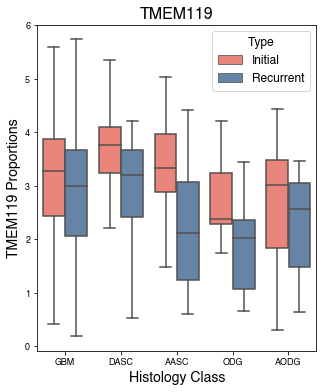

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(5,6))
plt.title("TMEM119", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Histology', y='value',hue="variable", data=TMEM119_mdf)
ax.set_xlabel("Histology Class", fontsize=14)
ax.set_ylabel("TMEM119 Proportions", fontsize=14)  
labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
ax.set_xticklabels(labels)
# legend = ["Initial", "Recurrent"]
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [19]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for p in histologies:
    specific_progression = TMEM119_mdf.loc[TMEM119_mdf['Histology'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.7355481221511457, pvalue=0.08264376564308626)
--------------------------------
Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=2.752988806446741, pvalue=0.005905391532593248)
--------------------------------
Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=2.0784609690826525, pvalue=0.03766692222862868)
--------------------------------
Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.8142294704442907, pvalue=0.06964240479832813)
--------------------------------
Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=0.5251050315105037, pvalue=0.5995101785600032)
--------------------------------


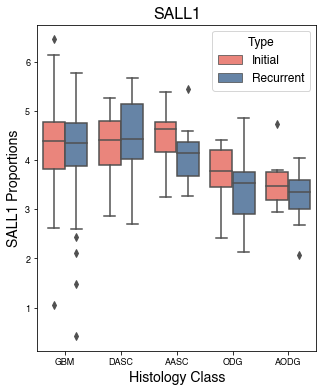

In [20]:
#SALL1
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "SALL1"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "SALL1"]
recurrence.columns = ['Recurrent']
SALL1_data = initial.join(recurrence)
SALL1_final = pd.concat([pathology, SALL1_data], axis=1)
SALL1_final.index.name = 'Mixture'
SALL1_final = SALL1_final.drop(['Molecular pathology (per GLASS)'], axis=1)
SALL1_final = SALL1_final.sort_values(by='Mixture')
SALL1_mdf = pd.melt(SALL1_final.reset_index(), id_vars=('Mixture','Histology'))
plt.figure(figsize=(5,6))
plt.title("SALL1", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Histology', y='value',hue="variable", data=SALL1_mdf)
ax.set_xlabel("Histology Class", fontsize=14)
ax.set_ylabel("SALL1 Proportions", fontsize=14)  
labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
ax.set_xticklabels(labels)
# legend = ["Initial", "Recurrent"]
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [26]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for p in histologies:
    specific_progression = SALL1_mdf.loc[SALL1_mdf['Histology'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=0.4560629809886077, pvalue=0.6483446894408792)
--------------------------------
Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.7128274588121026, pvalue=0.47595253190307696)
--------------------------------
Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.7320508075688772, pvalue=0.0832645166635504)
--------------------------------
Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=0.9827076298239908, pvalue=0.3257513544787166)
--------------------------------
Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=0.7351470441147051, pvalue=0.4622499461255427)
--------------------------------


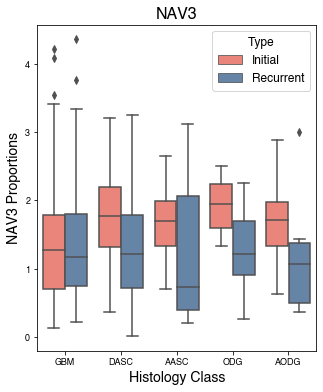

In [22]:
#NAV3
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "NAV3"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "NAV3"]
recurrence.columns = ['Recurrent']
NAV3_data = initial.join(recurrence)
NAV3_final = pd.concat([pathology, NAV3_data], axis=1)
NAV3_final.index.name = 'Mixture'
NAV3_final = NAV3_final.drop(['Molecular pathology (per GLASS)'], axis=1)
NAV3_final = NAV3_final.sort_values(by='Mixture')
NAV3_mdf = pd.melt(NAV3_final.reset_index(), id_vars=('Mixture','Histology'))
plt.figure(figsize=(5,6))
plt.title("NAV3", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Histology', y='value',hue="variable", data=NAV3_mdf)
ax.set_xlabel("Histology Class", fontsize=14)
ax.set_ylabel("NAV3 Proportions", fontsize=14)  
labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
ax.set_xticklabels(labels)
# legend = ["Initial", "Recurrent"]
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [23]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for p in histologies:
    specific_progression = NAV3_mdf.loc[NAV3_mdf['Histology'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.1576956476502848, pvalue=0.8746966302533197)
--------------------------------
Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=2.4907993963089563, pvalue=0.012745605994867088)
--------------------------------
Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.5011106998930268, pvalue=0.13332693177434943)
--------------------------------
Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=2.4945655218609, pvalue=0.012611144099313947)
--------------------------------
Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.7853571071357126, pvalue=0.07420341132975512)
--------------------------------


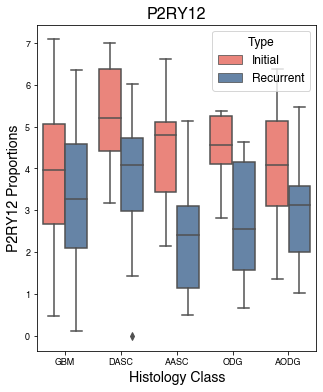

In [24]:
#P2RY12
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "P2RY12"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "P2RY12"]
recurrence.columns = ['Recurrent']
P2RY12_data = initial.join(recurrence)
P2RY12_final = pd.concat([pathology, P2RY12_data], axis=1)
P2RY12_final.index.name = 'Mixture'
P2RY12_final = P2RY12_final.drop(['Molecular pathology (per GLASS)'], axis=1)
P2RY12_final = P2RY12_final.sort_values(by='Mixture')
P2RY12_mdf = pd.melt(P2RY12_final.reset_index(), id_vars=('Mixture','Histology'))
plt.figure(figsize=(5,6))
plt.title("P2RY12", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Histology', y='value',hue="variable", data=P2RY12_mdf)
ax.set_xlabel("Histology Class", fontsize=14)
ax.set_ylabel("P2RY12 Proportions", fontsize=14)  
labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
ax.set_xticklabels(labels)
# legend = ["Initial", "Recurrent"]
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [25]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for p in histologies:
    specific_progression = P2RY12_mdf.loc[P2RY12_mdf['Histology'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=2.605562178221751, pvalue=0.009172362370552682)
--------------------------------
Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=3.523170198726484, pvalue=0.0004264174320475277)
--------------------------------
Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=2.7712812921102032, pvalue=0.005583616806378765)
--------------------------------
Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=2.418972627259054, pvalue=0.015564411386633814)
--------------------------------
Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.3652730819273096, pvalue=0.172167236066597)
--------------------------------
